### Animations of sea ice thickness 

In [1]:
# mom6_tools
from mom6_tools.DiagsCase import DiagsCase
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6toolbox import genBasinMasks
from mom6_tools.m6plot import myStats, annotateStats
from mom6_tools.m6plot import polarplot
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature
import matplotlib.path as mpath
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import xarray as xr
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from xmovie import Movie
import warnings, os, yaml
warnings.filterwarnings("ignore")

Basemap module not found. Some regional plots may not function properly


In [2]:
%%capture 
# comment above line to see details about the run(s) displayed
from misc import *
%matplotlib inline

In [3]:
from ncar_jobqueue import NCARCluster
from dask.distributed import Client

cluster = NCARCluster(memory='2GB', processes=1)
cluster.scale(20)
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/gmarques/high-mem/proxy/8787/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/gmarques/high-mem/proxy/8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.12.206.39:38961,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/gmarques/high-mem/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [4]:
def preprocess(ds):
    variables = ['hi']
    return ds[variables]

### Sea ice

In [5]:
OUTDIR

['/glade/scratch/gmarques/bmom.e23.f09_t061_zstar_N65.nuopc.GM_tuning.002/run/',
 '/glade/scratch/hannay/archive/b.cesm3_cam058_mom_c.B1850WscMOM.ne30_L58_t061.009/ocn/hist/',
 '/glade/scratch/hannay/archive/b.cesm3_cam058_mom_e.B1850MOM.f09_L32_t061.cam6_cice5.016/ocn/hist/',
 '/glade/scratch/hannay/archive/b.cesm3_cam058_mom_e.B1850MOM.ne30_L32_t061.cam6_cice5.017/ocn/hist/',
 '/glade/scratch/hannay/archive/b.cesm3_cam058_mom_e.B1850MOM.ne30_L32_t061.cam6_cice5.018b/ocn/hist/',
 '/glade/scratch/hannay/archive/b.cesm3_cam058_mom_e.B1850MOM.ne30_L32_t061.cam6_cice5.019b/ocn/hist/',
 '/glade/scratch/hannay/archive/b.cesm3_cam058_mom_e.B1850MOM.ne30_L32_t061.camdev_cice5.020/ocn/hist/']

In [7]:
ds = xr.open_mfdataset(OUTDIR[1]+'../../ice/hist/'+casename[1]+'.cice.h.*.nc', 
                       parallel=True, preprocess=preprocess)

In [8]:
start_date

'0001-01-01'

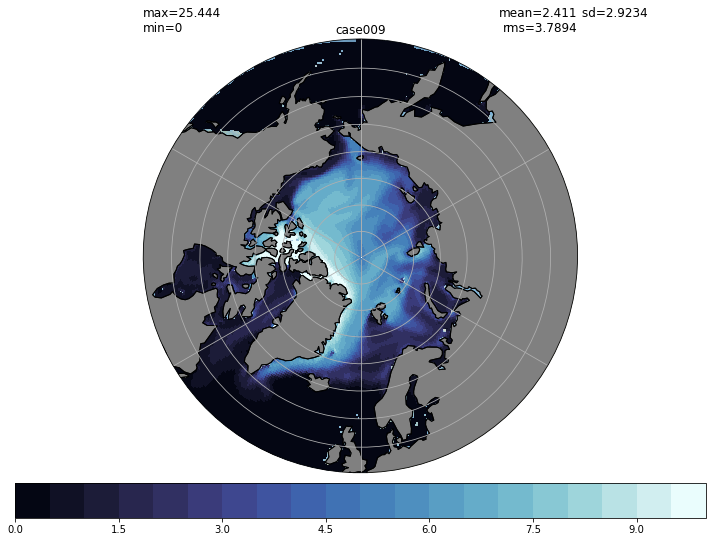

In [25]:
# Sea ice thickness
hi_mean = np.ma.masked_invalid(ds['hi'][-1,:].values)
#hi_mean = np.ma.masked_where(aice_mean < 15.0, hi_mean)

#suptitle = ('ANN mean sea ice thickness, ' + str(start_date) + ' to ' + str(end_date))
# SH
#fig = plt.figure(figsize=(10,8))
#ax = plt.gca(projection=ccrs.SouthPolarStereo())
#polarplot(hi_mean, grd, title=dcase.casename, debug=False, 
#          colormap=plt.cm.gist_ncar, clim=(0,2), axis=ax)
#plt.suptitle(suptitle)
#plt.savefig(figname+'hi_ann_mean_SH.png')
# NH
fig = plt.figure(figsize=(10,8))
ax = plt.gca(projection=ccrs.NorthPolarStereo())
polarplot(hi_mean, grd, title=label[1], debug=False, colormap=cm.cm.ice, 
          clim=(0,10), axis=ax, proj='NP')
#ax.grid('None')
ax.coastlines()
ax.stock_img();
#ax.gridlines();
#plt.suptitle(suptitle)
#plt.savefig(figname+'hi_ann_mean_NH.png')

In [ ]:
#fig, ax = plt.subplots(figsize=(10, 5), projection=ccrs.Orthographic(0, 90))
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))

ds.hi[-1,:].plot(ax=ax, vmin=0, vmax=2, cmap=cm.cm.ice, transform=ccrs.PlateCarree())
#ax.plot([-45, -45], [40, 65], '-', color='k', lw=5)
#ax.set_xlim(-80,-20)
#ax.set_ylim(40,75)
ax.coastlines()
ax.gridlines()
ax.set_title('Section');

### Salinity

In [16]:
for n in [1,2,3,4,5,6]:
  print(casename[n])
  ds = xr.open_mfdataset(OUTDIR[n]+'/'+casename[n]+'.mom6.h_*.nc', 
                       parallel=True, preprocess=preprocess)
    
  ds1 = ds.sel(xh=-45, method="nearest").sel(yh=slice(40,65),
              z_l=slice(0,300)).sel(time=slice('0001-01-01',end_date)).drop('xh')
    
  mov = Movie(ds1.so, plotmethod='contourf', vmin=32, vmax=37, yincrease=False,
            levels=20, cmap=cm.cm.haline, extend="both")

  fname='salt_section/{}_salt_secton_south_greenland.mov'.format(label[n])
  mov.save(fname,progress=True, framerate=15, 
         overwrite_existing=True, parallel=True)

b.cesm3_cam058_mom_c.B1850WscMOM.ne30_L58_t061.009
Movie created at case009_salt_secton_south_greenland.mov
b.cesm3_cam058_mom_e.B1850MOM.f09_L32_t061.cam6_cice5.016
Movie created at case016_salt_secton_south_greenland.mov
b.cesm3_cam058_mom_e.B1850MOM.ne30_L32_t061.cam6_cice5.017
Movie created at case017_salt_secton_south_greenland.mov
b.cesm3_cam058_mom_e.B1850MOM.ne30_L32_t061.cam6_cice5.018b
Movie created at case018b_salt_secton_south_greenland.mov
b.cesm3_cam058_mom_e.B1850MOM.ne30_L32_t061.cam6_cice5.019b
Movie created at case019b_salt_secton_south_greenland.mov
b.cesm3_cam058_mom_e.B1850MOM.ne30_L32_t061.camdev_cice5.020
Movie created at case020_salt_secton_south_greenland.mov


### Temperature

In [25]:
for n in [1,2,3,4,5,6]:
  print(casename[n])
  ds = xr.open_mfdataset(OUTDIR[n]+'/'+casename[n]+'.mom6.h_*.nc', 
                       parallel=True, preprocess=preprocess)
    
  ds1 = ds.sel(xh=-45, method="nearest").sel(yh=slice(40,65),
              z_l=slice(0,300)).sel(time=slice('0001-01-01',end_date)).drop('xh')
    
  mov = Movie(ds1.thetao, plotmethod='contourf', vmin=-1.8, vmax=18, yincrease=False,
            levels=20, cmap=cm.cm.thermal, extend="both")

  fname='temp_section/{}_temp_secton_south_greenland.mov'.format(label[n])
  mov.save(fname,progress=True, framerate=15, 
         overwrite_existing=True, parallel=True)

b.cesm3_cam058_mom_c.B1850WscMOM.ne30_L58_t061.009
Movie created at case009_temp_secton_south_greenland.mov
b.cesm3_cam058_mom_e.B1850MOM.f09_L32_t061.cam6_cice5.016
Movie created at case016_temp_secton_south_greenland.mov
b.cesm3_cam058_mom_e.B1850MOM.ne30_L32_t061.cam6_cice5.017
Movie created at case017_temp_secton_south_greenland.mov
b.cesm3_cam058_mom_e.B1850MOM.ne30_L32_t061.cam6_cice5.018b
Movie created at case018b_temp_secton_south_greenland.mov
b.cesm3_cam058_mom_e.B1850MOM.ne30_L32_t061.cam6_cice5.019b
Movie created at case019b_temp_secton_south_greenland.mov
b.cesm3_cam058_mom_e.B1850MOM.ne30_L32_t061.camdev_cice5.020
Movie created at case020_temp_secton_south_greenland.mov


In [13]:
def custom_plotfunc(ds, fig, tt, *args, **kwargs):
    fig, ax = plt.subplots(figsize=(10, 5))
    ds.isel(time=tt).plot(ax=ax, vmin=-2, vmax=8, cmap='RdBu_r')
    ax.set_xlim(-80,-20)
    ax.set_ylim(40,75)

    return None, None
    # ^ This is not strictly necessary, but otherwise a warning will be raised.

#mov_custom.preview(30)

In [ ]:
mov_custom = Movie(ds.tos, custom_plotfunc)
mov_custom.save(
    'movie_parallel.mov',
    parallel=False,
    overwrite_existing=True,
)

In [7]:
mov_parallel = Movie(ds.tos.chunk({'time':1}).isel(time=slice(0,30)), vmin=-2, vmax=32)

In [8]:
%%time
mov_parallel.save(
    'movie_parallel.mov',
    parallel=True,
    overwrite_existing=True,
)

Movie created at movie_parallel.mov
CPU times: user 658 ms, sys: 87.8 ms, total: 746 ms
Wall time: 19.8 s
